## The SRNs Codes

# Gillespie algorithm for simulating a stochastic reaction network.

### The genral Gillespie Algorithm for our study

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def gillespie_algorithm(init_state, vectors, propensities, max_time):  # A function SRNs algorithms
    state = np.array(init_state)            # Initial states (i.e X(t))
    time = 0.0                              # Initial time (i.e t =0)
    times = [time]                          # Creat a list for time
    states = [state.copy()]                 # Creat a list for states
    
    while time < max_time:                  # t < T
        a = np.array(propensities(state))   # propensities (i.e a_{j}(x))
        a0 = np.sum(a)                      # Total propensities (i.e a_{total}(x))
        if a0 == 0:                         # a_{total}(x) = 0 the while loop will break
            break

        #r1, r2 = np.random.random(2)
        r1 , r2= np.random.uniform(0, 1, 2)  # Generating 2 random uniform samples    
        h = (1/a0)*(np.log(1/r1))            # Time for the next reaction h
        cumsum_a = np.cumsum(a)              # Cumulative sum a
        vector_index = np.searchsorted(cumsum_a, r2*a0)  # Check if the cumulative_sum_a > r2*a0

        time += h                           # Update the time with the next reaction time h
        state += vectors[vector_index]      # Update the state with the vector index after the check

        times.append(time)                  # Append all the values for the time
        states.append(state.copy())         # Append all the values for the states
    
    return times, states

# Example for Gene Reaction Network
## Gene reaction network with linear scale

In [37]:
def gene_propensities(state):
    mRNA, Protein, Dimer = state
    k1 = 25
    k2 = 10**3
    k3 = 10**(-3)
    k4 = 0.1
    k5 = 1
    return [k1, k2*mRNA, k3*Protein*(Protein - 1), k4*mRNA, k5*Protein]

# Define reactions: (change in mRNA, change in Protein, change in Dimer)
gene_vectors = [
    (+1, 0, 0),  # DNA -> mRNA
    (0, +1, 0),  # mRNA -> mRNA + Protein
    (0, -2, +1), # 2Protein -> Dimer
    (-1, 0, 0),  # mRNA -> DNA
    (0, -1, 0)   # Protein -> DNA
]

# Initial counts of mRNA, Protein, and Dimer
init_state = [0, 0, 0]
max_time = 1
num_simulations = 50

# Store results from multiple simulations
all_times = []
all_states = []

for _ in range(num_simulations):
    times, states = gillespie_algorithm(init_state, gene_vectors,
                                        gene_propensities, max_time)
    all_times.append(times)
    all_states.append(np.array(states))

# Linear Plot

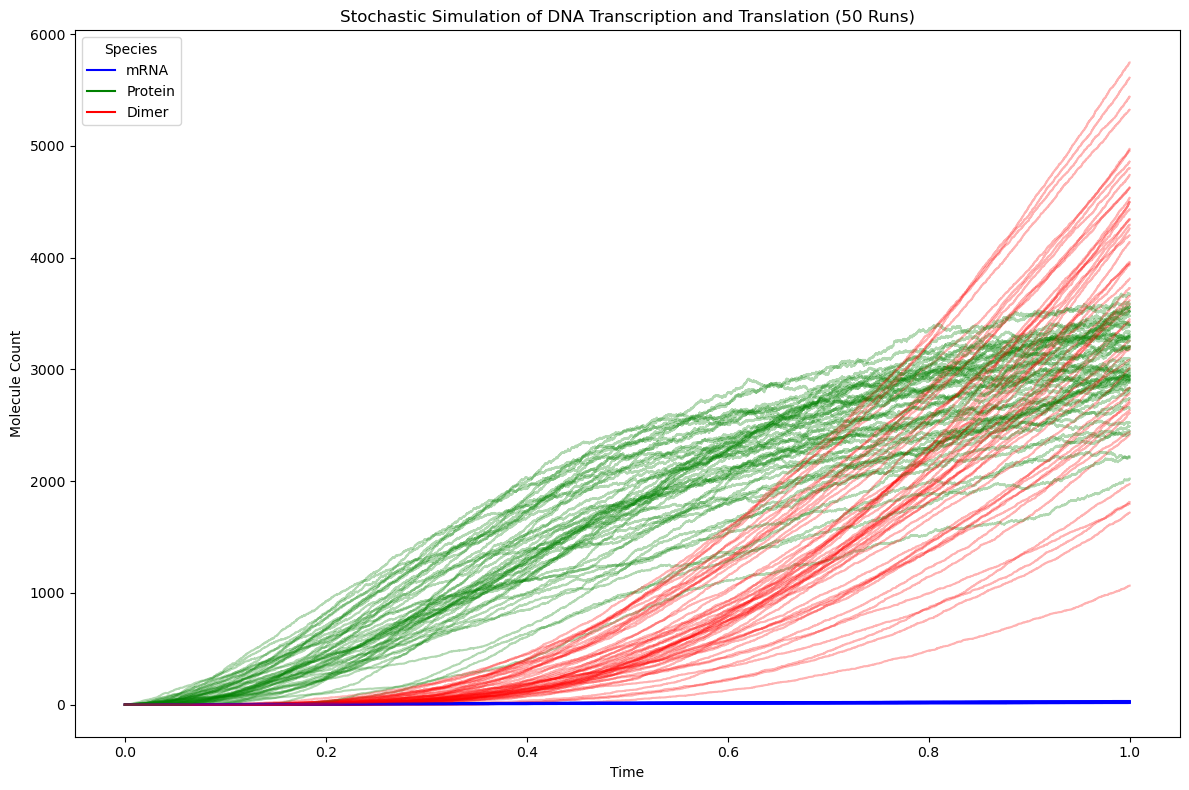

In [41]:
# Plot the results for each simulation
plt.figure(figsize=(12, 8))

for sim_num, (times, states) in enumerate(zip(all_times, all_states), start=1):
    mRNA_counts, Protein_counts, Dimer_counts = states[:, 0], states[:, 1], states[:, 2]
    plt.plot(times, mRNA_counts, color='blue', alpha=0.3)
    plt.plot(times, Protein_counts, color='green', alpha=0.3)
    plt.plot(times, Dimer_counts, color='red', alpha=0.3)

# Add plot details
plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.title('Stochastic Simulation of DNA Transcription and Translation (50 Runs)')
#plt.grid(True)
plt.tight_layout()

# Use dummy plots for a single legend that represents all simulations collectively
plt.plot([], [], label='mRNA', color='blue')
plt.plot([], [], label='Protein', color='green')
plt.plot([], [], label='Dimer', color='red')
plt.legend(loc='upper left', title='Species')

# Show the plot
plt.show()

# Gene reaction network with linear scale and Log scale

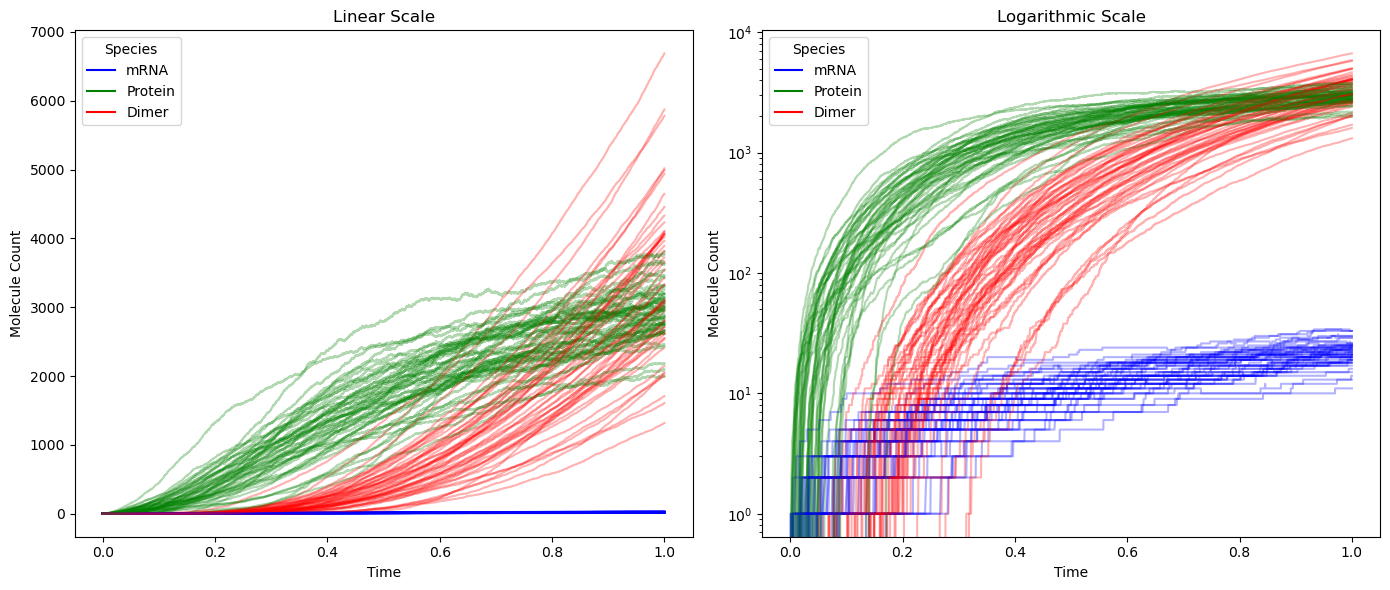

In [32]:
# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the results for each simulation on the linear scale (left subplot)
for sim_num, (times, states) in enumerate(zip(all_times, all_states), start=1):
    mRNA_counts, Protein_counts, Dimer_counts = states[:, 0], states[:, 1], states[:, 2]
    ax1.plot(times, mRNA_counts, color='blue', alpha=0.3)
    ax1.plot(times, Protein_counts, color='green', alpha=0.3)
    ax1.plot(times, Dimer_counts, color='red', alpha=0.3)

# Customize the left plot (linear scale)
ax1.set_xlabel('Time')
ax1.set_ylabel('Molecule Count')
ax1.set_title('Linear Scale')
ax1.plot([], [], label='mRNA', color='blue')
ax1.plot([], [], label='Protein', color='green')
ax1.plot([], [], label='Dimer', color='red')
ax1.legend(loc='upper left', title='Species')

# Plot the results for each simulation on the log scale (right subplot)
for sim_num, (times, states) in enumerate(zip(all_times, all_states), start=1):
    mRNA_counts, Protein_counts, Dimer_counts = states[:, 0], states[:, 1], states[:, 2]
    ax2.plot(times, mRNA_counts, color='blue', alpha=0.3)
    ax2.plot(times, Protein_counts, color='green', alpha=0.3)
    ax2.plot(times, Dimer_counts, color='red', alpha=0.3)

# Customize the right plot (logarithmic scale)
ax2.set_xlabel('Time')
ax2.set_ylabel('Molecule Count')
ax2.set_title('Logarithmic Scale')
ax2.set_yscale('log')
ax2.plot([], [], label='mRNA', color='blue')
ax2.plot([], [], label='Protein', color='green')
ax2.plot([], [], label='Dimer', color='red')
ax2.legend(loc='upper left', title='Species')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Example for Simple Chemical Reaction Network

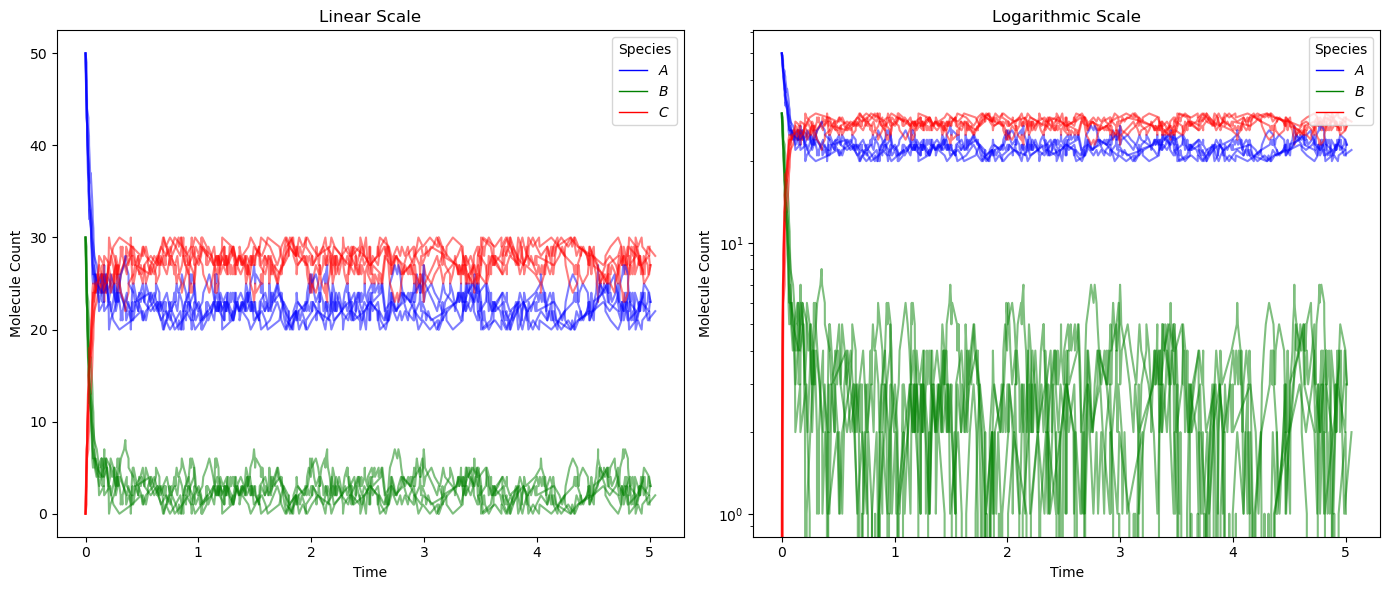

In [8]:
from matplotlib.lines import Line2D  # Import Line2D for customized legend

def che_react_propensities(state):
    A, B, C = state
    k1 = 0.5  # Rate constant for A + B -> C
    k2 = 1   # Rate constant for C -> A + B
    return [k1*A*B, k2* C]

# Define reaction vectors: (change in A, change in B, change in C)
che_react_vectors = [
    (-1, -1, +1),  # A + B -> C
    (+1, +1, -1)   # C -> A + B
]

# Initial counts of A, B, and C
init_state = [50, 30, 0]  # Starting with 50 A, 30 B, and 0 C
max_time = 5              # Duration of the simulation
num_simulations = 5       # Single simulation for clarity

# Gillespie algorithm
def gillespie_algorithm(init_state, reaction_vectors, propensities, max_time):
    state = np.array(init_state)
    time = 0
    times = [time]
    states = [state.copy()]

    while time < max_time:
        rates = propensities(state)
        total_rate = sum(rates)
        if total_rate == 0:
            break
        
        # Time step
        time_step = np.random.exponential(1 / total_rate)
        time += time_step
        
        # Select reaction
        reaction_index = np.random.choice(len(reaction_vectors), p=np.array(rates) / total_rate)
        
        # Update state
        state += reaction_vectors[reaction_index]
        
        # Store results
        times.append(time)
        states.append(state.copy())
    
    return np.array(times), np.array(states)

# Store results from multiple simulations
all_times = []
all_states = []

for _ in range(num_simulations):
    times, states = gillespie_algorithm(init_state, che_react_vectors,
                                        che_react_propensities, max_time)
    all_times.append(times)
    all_states.append(np.array(states))

# Set up a 1x2 subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the time evolution of A, B, and C with distinct colors
for times, states in zip(all_times, all_states):
    A_counts, B_counts, C_counts = states[:, 0], states[:, 1], states[:, 2]
    
    # Linear scale plot (LHS)
    ax1.plot(times, A_counts, color='blue', label='$A$', alpha=0.5)
    ax1.plot(times, B_counts, color='green', label='$B$', alpha=0.5)
    ax1.plot(times, C_counts, color='red', label='$C$', alpha=0.5)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Molecule Count')
    ax1.set_title('Linear Scale')
    
    
    
    # Log scale plot (RHS)
    ax2.plot(times, A_counts, color='blue', label='$A$', alpha=0.5)
    ax2.plot(times, B_counts, color='green', label='$B$', alpha=0.5)
    ax2.plot(times, C_counts, color='red', label='$C$', alpha=0.5)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Molecule Count')
    ax2.set_yscale('log')
    ax2.set_title('Logarithmic Scale')

    
# Custom legend with color codes
custom_lines = [
    Line2D([0], [0], color='blue', lw=1, label='$A$'),
    Line2D([0], [0], color='green', lw=1, label='$B$'),
    Line2D([0], [0], color='red', lw=1, label='$C$')]


# # Add legend once for each subplot
ax1.legend(handles=custom_lines, loc='upper right', title='Species')
ax2.legend(handles=custom_lines, loc='upper right', title='Species')

#plt.suptitle('Stochastic Simulation of Simple Chemical Reaction Network')
plt.tight_layout()
plt.show()


# Example for SIR Reaction Network

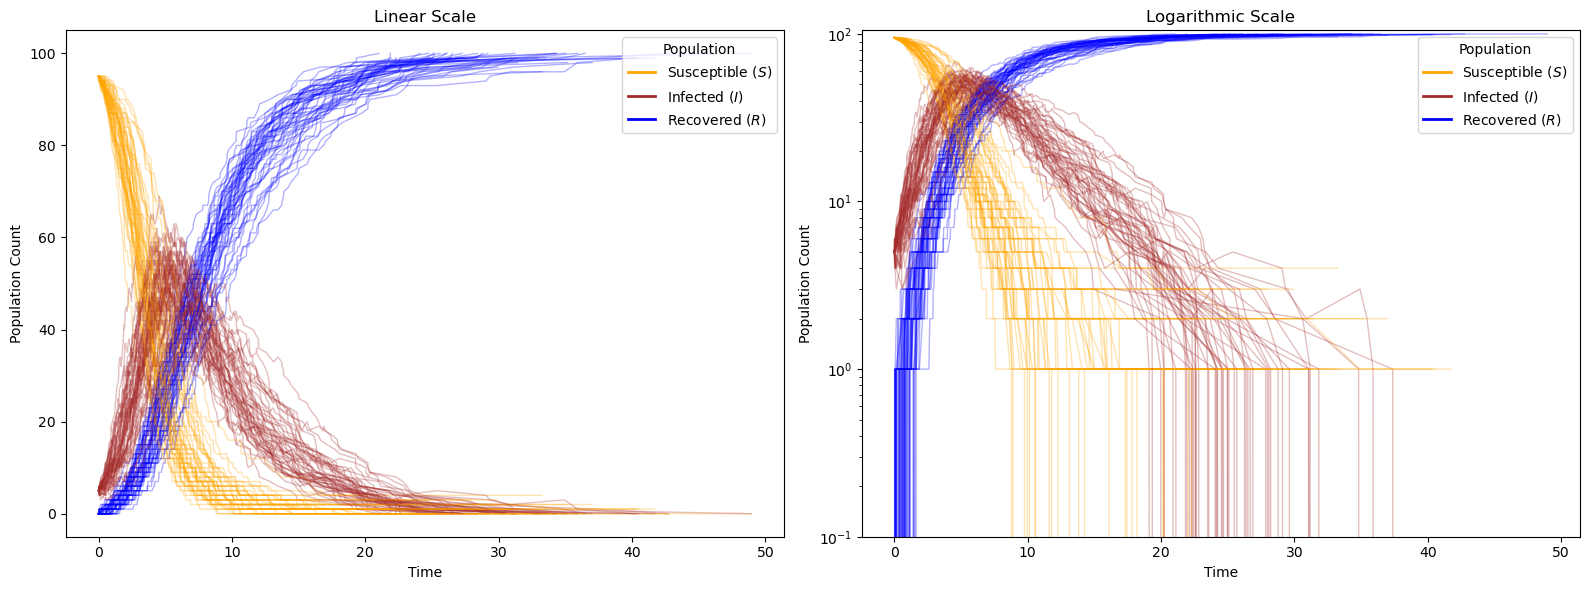

In [3]:
def SIR_propensities(state):
    S, I, R = state
    k1 = 0.01  # Infection rate
    k2 = 0.2  # Recovery rate
    return [k1 * S * I, k2 * I]

# Define reactions: (change in S, change in I, change in R)
SIR_reactions = [
    (-1, +1, 0),  # S + I -> 2I (infection)
    (0, -1, +1)   # I -> R (recovery)
]

# Initial counts of S, I, and R
init_state = [95, 5, 0]     # Start with 95 susceptible, 5 infected, 0 recovered
max_time = 100              # Simulate for 100 time units
num_simulations = 50        # Run 50 simulations

# Store results from multiple simulations
all_times = []
all_states = []

for _ in range(num_simulations):
    times, states = gillespie_algorithm(init_state, SIR_reactions, 
                                        SIR_propensities, max_time)
    all_times.append(times)
    all_states.append(np.array(states))

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for better distinction
colors = {'S': 'orange', 'I': 'brown', 'R': 'blue'}

# Plot the results for each simulation on the linear scale (left subplot)
for sim_num, (times, states) in enumerate(zip(all_times, all_states), start=1):
    S_counts, I_counts, R_counts = states[:, 0], states[:, 1], states[:, 2]
    ax1.plot(times, S_counts, color=colors['S'], alpha=0.3, lw=1)
    ax1.plot(times, I_counts, color=colors['I'], alpha=0.3, lw=1)
    ax1.plot(times, R_counts, color=colors['R'], alpha=0.3, lw=1)

# Customize the left plot (linear scale)
ax1.set_xlabel('Time')
ax1.set_ylabel('Population Count')
ax1.set_title('Linear Scale')
ax1.plot([], [], label='Susceptible ($S$)', color=colors['S'], lw=2)
ax1.plot([], [], label='Infected ($I$)', color=colors['I'], lw=2)
ax1.plot([], [], label='Recovered ($R$)', color=colors['R'], lw=2)
ax1.legend(loc='upper right', title='Population')

# Plot the results for each simulation on the log scale (right subplot)
for sim_num, (times, states) in enumerate(zip(all_times, all_states), start=1):
    S_counts, I_counts, R_counts = states[:, 0], states[:, 1], states[:, 2]
    ax2.plot(times, S_counts, color=colors['S'], alpha=0.3, lw=1)
    ax2.plot(times, I_counts, color=colors['I'], alpha=0.3, lw=1)
    ax2.plot(times, R_counts, color=colors['R'], alpha=0.3, lw=1)

# Customize the right plot (logarithmic scale)
ax2.set_xlabel('Time')
ax2.set_ylabel('Population Count')
ax2.set_title('Logarithmic Scale')
ax2.set_yscale('log')
ax2.set_ylim(0.1, max(init_state) + 10)
ax2.plot([], [], label='Susceptible ($S$)', color=colors['S'], lw=2)
ax2.plot([], [], label='Infected ($I$)', color=colors['I'], lw=2)
ax2.plot([], [], label='Recovered ($R$)', color=colors['R'], lw=2)
ax2.legend(loc='upper right', title='Population')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Simulation plot of the SIRD model

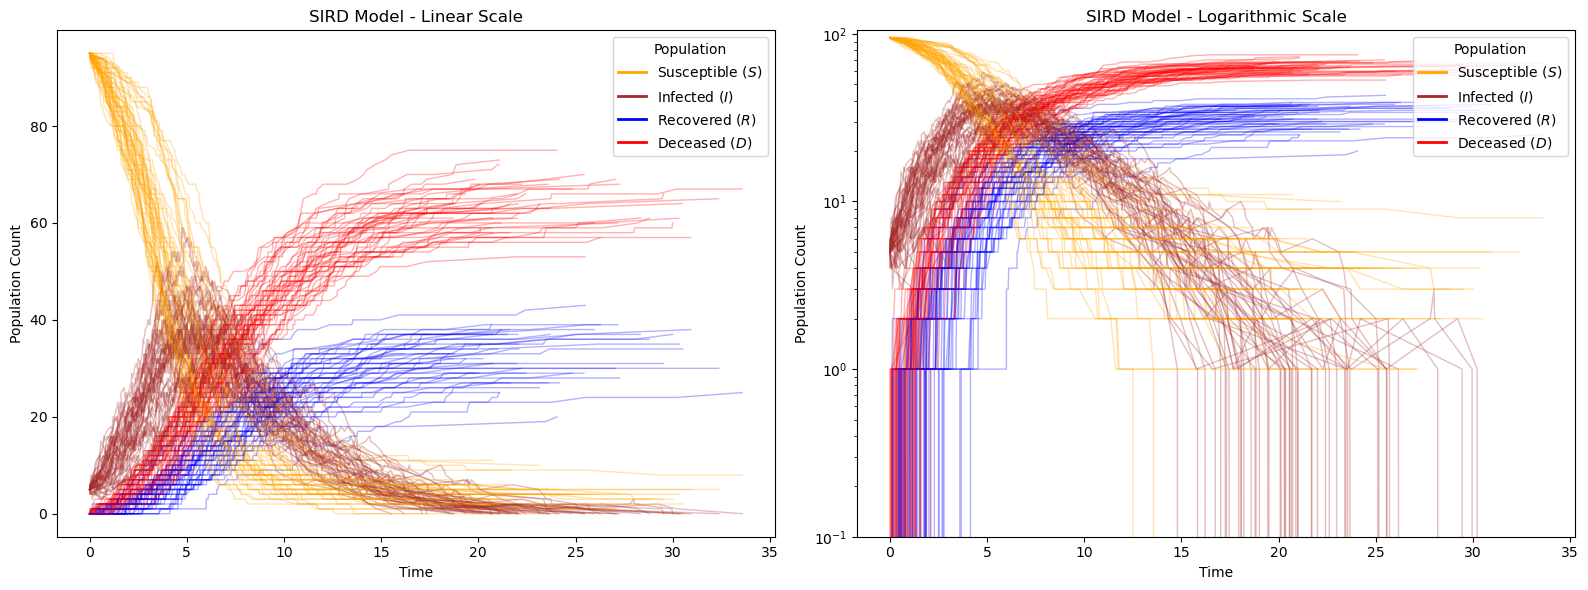

In [4]:
def SIRD_propensities(state):
    S, I, R, D = state
    k1 = 0.01  # Infection rate
    k2 = 0.1  # Recovery rate
    k3 = 0.2 # Death rate
    return [k1 * S * I, k2 * I, k3 * I]

# Define reactions: (change in S, change in I, change in R, change in D)
SIRD_reactions = [
    (-1, +1, 0, 0),  # S + I -> 2I (infection)
    (0, -1, +1, 0),  # I -> R (recovery)
    (0, -1, 0, +1)   # I -> D (deceased)
]

# Initial counts of S, I, R, and D
init_state = [95, 5, 0, 0]  # Start with 95 susceptible, 5 infected, 0 recovered, 0 deceased
max_time = 100              # Simulate for 100 time units
num_simulations = 50        # Run 50 simulations

# Store results from multiple simulations
all_times = []
all_states = []

for _ in range(num_simulations):
    times, states = gillespie_algorithm(init_state, SIRD_reactions, 
                                        SIRD_propensities, max_time)
    all_times.append(times)
    all_states.append(np.array(states))

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for better distinction
colors = {'S': 'orange', 'I': 'brown', 'R': 'blue', 'D': 'red'}

# Plot the results for each simulation on the linear scale (left subplot)
for times, states in zip(all_times, all_states):
    S_counts, I_counts, R_counts, D_counts = states[:, 0], states[:, 1], states[:, 2], states[:, 3]
    ax1.plot(times, S_counts, color=colors['S'], alpha=0.3, lw=1)
    ax1.plot(times, I_counts, color=colors['I'], alpha=0.3, lw=1)
    ax1.plot(times, R_counts, color=colors['R'], alpha=0.3, lw=1)
    ax1.plot(times, D_counts, color=colors['D'], alpha=0.3, lw=1)

# Customize the left plot (linear scale)
ax1.set_xlabel('Time')
ax1.set_ylabel('Population Count')
ax1.set_title('SIRD Model - Linear Scale')
ax1.plot([], [], label='Susceptible ($S$)', color=colors['S'], lw=2)
ax1.plot([], [], label='Infected ($I$)', color=colors['I'], lw=2)
ax1.plot([], [], label='Recovered ($R$)', color=colors['R'], lw=2)
ax1.plot([], [], label='Deceased ($D$)', color=colors['D'], lw=2)
ax1.legend(loc='upper right', title='Population')

# Plot the results for each simulation on the log scale (right subplot)
for times, states in zip(all_times, all_states):
    S_counts, I_counts, R_counts, D_counts = states[:, 0], states[:, 1], states[:, 2], states[:, 3]
    ax2.plot(times, S_counts, color=colors['S'], alpha=0.3, lw=1)
    ax2.plot(times, I_counts, color=colors['I'], alpha=0.3, lw=1)
    ax2.plot(times, R_counts, color=colors['R'], alpha=0.3, lw=1)
    ax2.plot(times, D_counts, color=colors['D'], alpha=0.3, lw=1)

# Customize the right plot (logarithmic scale)
ax2.set_xlabel('Time')
ax2.set_ylabel('Population Count')
ax2.set_title('SIRD Model - Logarithmic Scale')
ax2.set_yscale('log')
ax2.set_ylim(0.1, max(init_state) + 10)
ax2.plot([], [], label='Susceptible ($S$)', color=colors['S'], lw=2)
ax2.plot([], [], label='Infected ($I$)', color=colors['I'], lw=2)
ax2.plot([], [], label='Recovered ($R$)', color=colors['R'], lw=2)
ax2.plot([], [], label='Deceased ($D$)', color=colors['D'], lw=2)
ax2.legend(loc='upper right', title='Population')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Simuation for the Decay Reaction Network Example

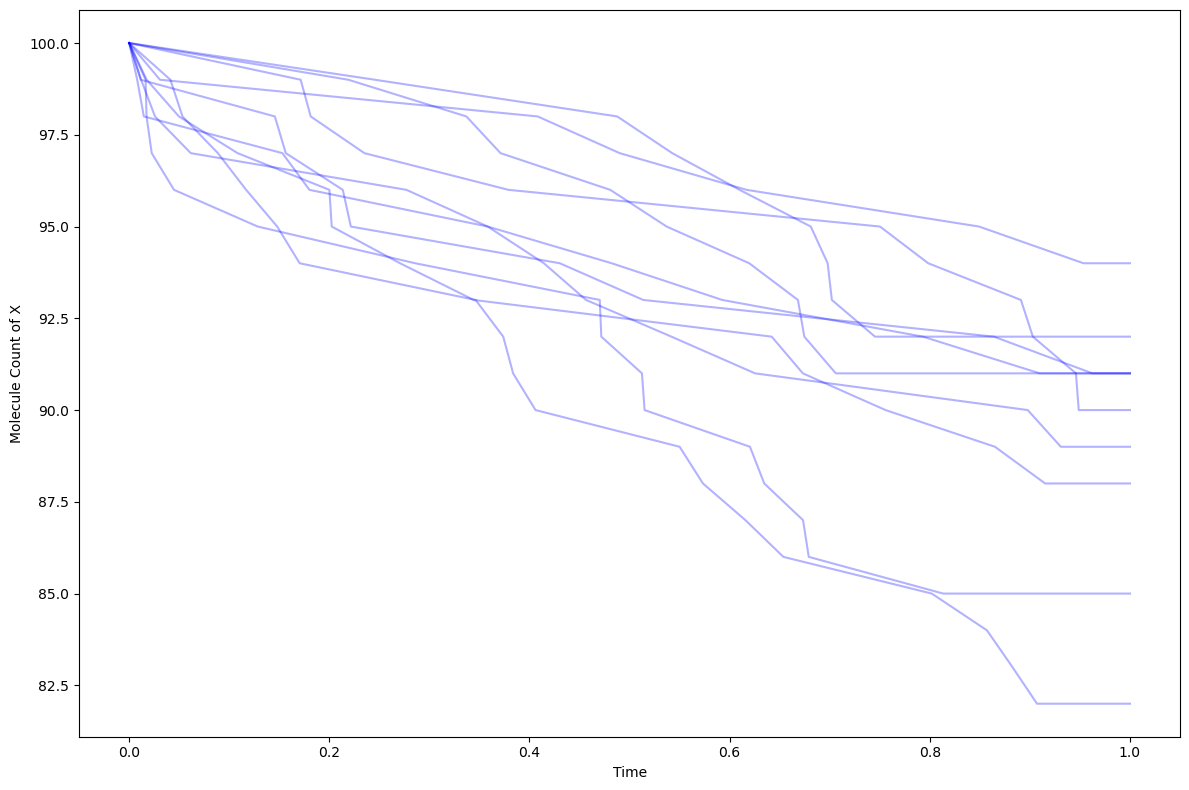

In [5]:
def decay_react_propensities(state):
    X = state[0]  # Only X in the state
    k1 = 0.1        # Rate constant for X -> empty
    return [k1 * X]

# Define reactions: (change in X)
decay_react_vectors = [
    (-1,),  # X -> empty
]

# Initial counts of A
init_state = [100]  # Starting with 100 X
max_time = 1        # Duration of the simulation
num_simulations = 10  # Number of simulations for averaging

# Gillespie algorithm
def gillespie_algorithm(init_state, reaction_vectors, propensities, max_time):
    state = np.array(init_state)
    time = 0
    times = [time]
    states = [state.copy()]

    while time < max_time:
        rates = propensities(state)
        total_rate = sum(rates)
        
        # If total_rate is 0, no further reactions can occur
        if total_rate == 0:
            break
        
        # Time step
        time_step = np.random.exponential(1 / total_rate)
        time += time_step
        
        # If time exceeds max_time, stop at max_time
        if time > max_time:
            time = max_time
            times.append(time)
            states.append(state.copy())
            break
        
        # Select reaction
        reaction_index = np.random.choice(len(reaction_vectors), p=np.array(rates) / total_rate)
        
        # Update state
        state += reaction_vectors[reaction_index]
        
        # Store results
        times.append(time)
        states.append(state.copy())
    
    # If decay completes early, append the last state up to max_time
    if times[-1] < max_time:
        times.append(max_time)
        states.append(states[-1])  # Keep the final state

    return np.array(times), np.array(states)

# Store results from multiple simulations
all_times = []
all_states = []

for _ in range(num_simulations):
    times, states = gillespie_algorithm(init_state, decay_react_vectors,
                                        decay_react_propensities, max_time)
    all_times.append(times)
    all_states.append(states)

# Plot the results for each simulation
plt.figure(figsize=(12, 8))

for sim_num, (times, states) in enumerate(zip(all_times, all_states), start=1):
    X_counts = states[:, 0]  # X molecule counts
    plt.plot(times, X_counts, color='blue', alpha=0.3)

# Add plot details
plt.xlabel('Time')
plt.ylabel('Molecule Count of X')
# plt.title('Stochastic Simulation of Decay Reaction (A -> empty)')
plt.tight_layout()

# # Use dummy plots for a single legend that represents all simulations collectively
# plt.plot([], [], label='$A$', color='blue')
# plt.legend(loc='upper left', title='Species')

# Show the plot
plt.show()